# Evaluation and Comparison

In diesem Notebook wird ein Deep Learning Model auf die Quelldaten angewendet.

## Table of Contents

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Visulization
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-07-02 16:53:54.489134: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prediction comparision

In [2]:
# Load predictions

# Load the df
df_deep = pd.read_csv('results/results_deep.csv')

# Load the df
df_tra = pd.read_csv('results/results_tra.csv')

### Traditional Methods

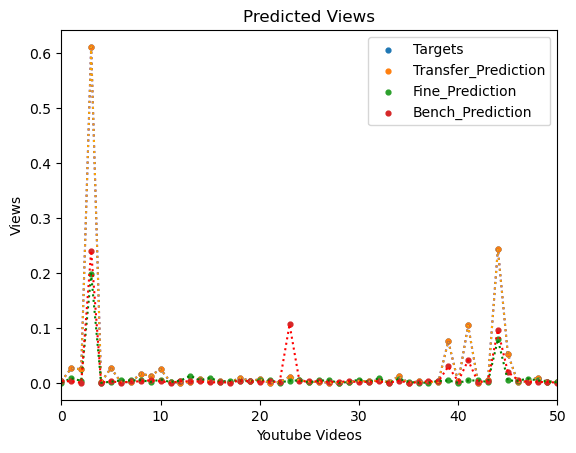

In [5]:
# Daten für den Scatter-Plot
data_tra = [
    (df_tra["traditional"], 'Targets', 'blue'),
    (df_tra["traditional"], 'Transfer_Prediction', 'orange'),
    (df_tra["tra_transfer_2"], 'Fine_Prediction', 'green'),
    (df_tra["tra_transfer_7"], 'Bench_Prediction', 'red')
]

# Schleife über die Daten
for i, (values, label, color) in enumerate(data_tra):
    plt.scatter(range(len(values)), values, label=label, s=12)
    plt.plot(range(len(values)), values, linestyle=':', color=color)

# Achsenbeschriftung und Titel
plt.xlabel('Youtube Videos')
plt.ylabel('Views')
plt.title('Predicted Views')
plt.xlim((0, 50))

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()

### Deep Methods

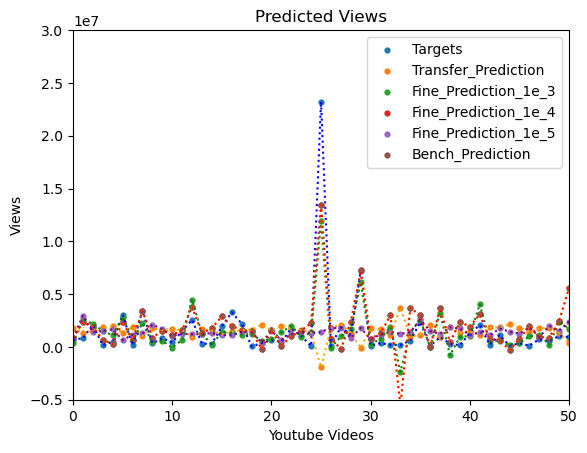

In [22]:
# Daten für den Scatter-Plot
data_deep = [
    (df_deep["targets"], 'Targets', 'blue'),
    (df_deep["deep_trasfer"], 'Transfer_Prediction', 'orange'),
    (df_deep["deep_fine_1e_3"], 'Fine_Prediction_1e_3', 'green'),
    (df_deep["deep_fine_1e_4"], 'Fine_Prediction_1e_4', 'yellow'),
    (df_deep["deep_fine_1e_5"], 'Fine_Prediction_1e_5', 'purple'),
    (df_deep["deep_base"], 'Bench_Prediction', 'red')
]

# Schleife über die Daten
for i, (values, label, color) in enumerate(data_deep):
    plt.scatter(range(len(values)), values, label=label, s=12)
    plt.plot(range(len(values)), values, linestyle=':', color=color)

# Achsenbeschriftung und Titel
plt.xlabel('Youtube Videos')
plt.ylabel('Views')
plt.title('Predicted Views')
plt.xlim((0, 50))
plt.ylim((-5000000, 30000000))

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()

## Compare Metrics

In [23]:
# Load metrics

# Load the df
deep_metrics = pd.read_csv('results/metrics_deep.csv')

# Load the df
tra_metrics = pd.read_csv('results/metrics_tra.csv')

metrics = pd.concat([deep_metrics,tra_metrics], axis=1).transpose().sort_index()

metrics

,0,1,2,3
deep_base,4.218222e+12,10.001443,2.053831e+06,146.240772
deep_fine_1e_3,2.169281e+12,6.775220,1.472848e+06,211.580532
deep_fine_1e_4,4.670075e+12,11.253568,2.161036e+06,210.871032
deep_fine_1e_5,1.634017e+13,8.943061,4.042298e+06,202.176270
deep_trasfer,2.574883e+13,15.008176,5.074331e+06,41.190525
tra_transfer_2,6.189956e+13,58.599699,7.867627e+06,6.197582
tra_transfer_7,1.012792e+14,25.645458,1.006376e+07,2.684898
traditional,5.475409e+12,5.178045,2.339959e+06,0.997787


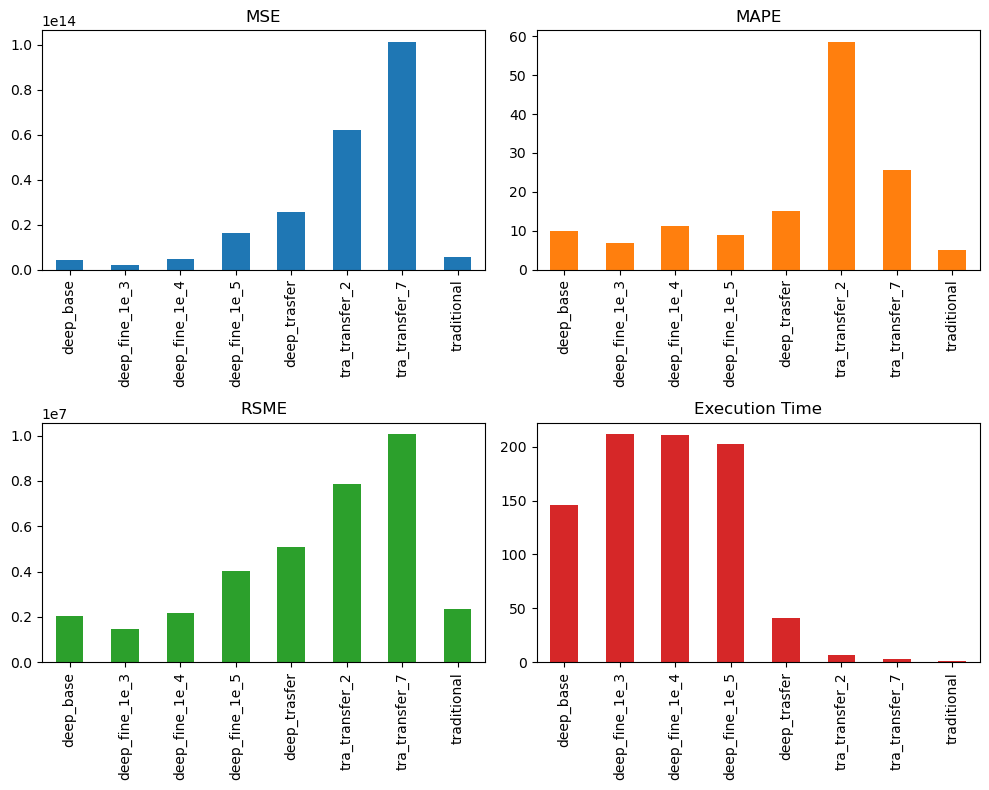

In [24]:
# Visulize Metrics

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

names = ["MSE", "MAPE", "RSME", "Execution Time"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Iterate over the columns of the df
for i, column in enumerate(metrics.columns):

    ax = axes[i]
    metrics[column].plot(kind='bar', ax=ax, color=colors[i])
    ax.set_title(names[i])


plt.tight_layout()
plt.show()


Vergleich der Transfer Techniken

## Compare Loss of Deep Learning Models

![Baseline](docs/base_loss.png) | ![Transfer and Fine_tuned Transfer](docs/deep_loss.png)

Vergleicht man des Loss zwischen der Baseline (links), die alleine auf Basis der Zieldaten trainiert ist, und der Transfer Learning Technik (rechts), fallen deutliche unterschiede auf. Während der Loss links stark abfällt, fällt dieser rechts langsamer. Die lässt sich damit erklären, dass der Loss rechts schon durch das Vortrainierte Modell recht niedrig anfängt. Während das Modell ohne Fine-tuning sich kaum verbessert, stagniert der Loss des Fine_Tuning Modells. Insgesammt ist der Loss des Modells ohne Transfer (links) geringer für Test als auch Validationset.

![Baseline](docs/pretrain_loss.png)

Für einen weiteren Vergleich der eben benannte Loss des Pretrained Modells.

# Anhang

Pretrained Modell:

![First Grid Search Results](docs/pretrain_model.png)

Fine Tuned Modell containing Pretrained: 

![First Grid Search Results](docs/fine_model.png)